#Exercise 1: Setting Up the Environment

1. Install Libraries:

In [1]:
!pip install pgmpy

2. Import Libraries:

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

#Exercise 2: Define the Bayesian Network Structure

1. Define the Variables:


In [3]:
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

#Exercise 3: Define Conditional Probability Tables (CPTs)

1. Create CPTs Using pgmpy:

In [5]:
# Age
age_cpd = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.4], [0.3]])

# Smoking
smoking_cpd = TabularCPD(variable='Smoking', variable_card=2, values=[[0.7], [0.3]])

# Exercise
exercise_cpd = TabularCPD(variable='Exercise', variable_card=2, values=[[0.6], [0.4]])

# Cholesterol level
cholesterol_cpd = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.5], [0.5]])

# Blood Pressure level
bp_cpd = TabularCPD(variable='BloodPressure', variable_card=2, values=[[0.4], [0.6]])

hd_cpd = TabularCPD(variable='HeartDisease', variable_card=2,
                               values=[

                                   [0.9, 0.8, 0.7, 0.6, 0.8, 0.7, 0.6, 0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3,
                                    0.8, 0.7, 0.6, 0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2,
                                    0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.2, 0.1],

                                   [0.1, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7,
                                    0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.8,
                                    0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.8, 0.6, 0.7, 0.8, 0.9]
                               ],
                               evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure'],
                               evidence_card=[3, 2, 2, 2, 2])

chest_pain_cpd = TabularCPD(variable='ChestPain', variable_card=2,
                            values=[

                                [0.9, 0.3],
                                [0.1, 0.7]
                            ],
                            evidence=['HeartDisease'], evidence_card=[2])

ecg_result_cpd = TabularCPD(variable='ECGResult', variable_card=2,
                            values=[

                                [0.85, 0.3],
                                [0.15, 0.7]
                            ],
                            evidence=['HeartDisease'], evidence_card=[2])

model.add_cpds(age_cpd, smoking_cpd, exercise_cpd, cholesterol_cpd, bp_cpd, hd_cpd, chest_pain_cpd, ecg_result_cpd)

#Exercise 4: Inference in the Bayesian Network

1. Perform Probabilistic Inference:

In [6]:
inference = VariableElimination(model)

heart_disease_query = inference.query(variables=['HeartDisease'],
                      evidence={'Age': 1, 'Smoking': 1, 'Cholesterol': 1, 'BloodPressure': 1})
print(heart_disease_query)

abnormal_ecg_query = inference.query(variables=['ECGResult'], evidence={'ChestPain': 1})
print(abnormal_ecg_query)


+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.2600 |
+-----------------+---------------------+
| HeartDisease(1) |              0.7400 |
+-----------------+---------------------+
+--------------+------------------+
| ECGResult    |   phi(ECGResult) |
+==============+==================+
| ECGResult(0) |           0.3790 |
+--------------+------------------+
| ECGResult(1) |           0.6210 |
+--------------+------------------+


2. Posterior Probability Analysis:

In [7]:
#Probability distribution of Heart Disease in patients who do not exercise.

hd_no_exer_query = inference.query(variables=['HeartDisease'], evidence={'Exercise': 1})
print(hd_no_exer_query)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.4800 |
+-----------------+---------------------+
| HeartDisease(1) |              0.5200 |
+-----------------+---------------------+


#Exercise 5: Parameter Learning from Simulated Data

1. Simulate a Healthcare Dataset:

In [10]:
df = pd.DataFrame({
    'Age': np.random.choice(['Young', 'Middle-aged', 'Old'], 1000),
    'Smoking': np.random.choice(['Yes', 'No'], 1000),
    'Exercise': np.random.choice(['Regular', 'None'], 1000),
    'Cholesterol': np.random.choice(['High', 'Normal'], 1000),
    'Blood Pressure': np.random.choice(['High', 'Normal'], 1000),
})

def determine_health(row):
    if row['Smoking'] == 'Yes' and row['Cholesterol'] == 'High':
        row['Heart Disease'] = 'Yes' if np.random.rand() < 0.7 else 'No'
    else:
        row['Heart Disease'] = 'Yes' if np.random.rand() < 0.2 else 'No'

    row['Chest Pain'] = 'Yes' if row['Heart Disease'] == 'Yes' and np.random.rand() < 0.5 else 'No'
    row['ECG Result'] = 'Abnormal' if row['Heart Disease'] == 'Yes' and np.random.rand() < 0.6 else 'Normal'
    return row

data = df.apply(determine_health, axis=1)

2. Estimate Parameters:

In [12]:
data = {
    'Heart_Disease': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'Chest_Pain': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'ECG_Result': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

def calculate_cpts(df, target_node, condition_nodes):
    cpts = {}

    grouped = df.groupby(condition_nodes)[target_node].value_counts(normalize=True).unstack(fill_value=0)

    for index in grouped.index:
        cpts[index] = grouped.loc[index].to_dict()

    return cpts

cpts_heart_disease = calculate_cpts(df, 'Heart_Disease', ['Chest_Pain', 'ECG_Result'])
cpts_chest_pain = calculate_cpts(df, 'Chest_Pain', ['Heart_Disease', 'ECG_Result'])
cpts_ecg_result = calculate_cpts(df, 'ECG_Result', ['Heart_Disease', 'Chest_Pain'])

print("Learned CPT for Heart Disease:")
print(cpts_heart_disease)

print("\nLearned CPT for Chest Pain:")
print(cpts_chest_pain)

print("\nLearned CPT for ECG Result:")
print(cpts_ecg_result)

initial_cpt_heart_disease = { (0,0): 0.2, (0,1): 0.3, (1,0): 0.5 }
initial_cpt_chest_pain = { (0,0): 0.4, (1,1): 0.6 }
initial_cpt_ecg_result = { (1,0): 0.7 }

def compare_cpts(learned_cpts, initial_cpts):
    comparison = {}
    for key in learned_cpts.keys():
        comparison[key] = {
            'Initial': initial_cpts.get(key),
            'Learned': learned_cpts[key]
        }
    return comparison

# comparison
comparison_heart_disease = compare_cpts(cpts_heart_disease, initial_cpt_heart_disease)
comparison_chest_pain = compare_cpts(cpts_chest_pain, initial_cpt_chest_pain)
comparison_ecg_result = compare_cpts(cpts_ecg_result, initial_cpt_ecg_result)

print("\nComparison of Heart Disease CPTS:")
print(comparison_heart_disease)

print("\nComparison of Chest Pain CPTS:")
print(comparison_chest_pain)

print("\nComparison of ECG Result CPTS:")
print(comparison_ecg_result)

Learned CPT for Heart Disease:
{(0, 0): {0: 1.0, 1: 0.0}, (0, 1): {0: 1.0, 1: 0.0}, (1, 0): {0: 0.0, 1: 1.0}, (1, 1): {0: 0.0, 1: 1.0}}

Learned CPT for Chest Pain:
{(0, 0): {0: 1.0, 1: 0.0}, (0, 1): {0: 1.0, 1: 0.0}, (1, 0): {0: 0.0, 1: 1.0}, (1, 1): {0: 0.0, 1: 1.0}}

Learned CPT for ECG Result:
{(0, 0): {0: 0.8, 1: 0.2}, (1, 1): {0: 0.2, 1: 0.8}}

Comparison of Heart Disease CPT:
{(0, 0): {'Initial': 0.2, 'Learned': {0: 1.0, 1: 0.0}}, (0, 1): {'Initial': 0.3, 'Learned': {0: 1.0, 1: 0.0}}, (1, 0): {'Initial': 0.5, 'Learned': {0: 0.0, 1: 1.0}}, (1, 1): {'Initial': None, 'Learned': {0: 0.0, 1: 1.0}}}

Comparison of Chest Pain CPT:
{(0, 0): {'Initial': 0.4, 'Learned': {0: 1.0, 1: 0.0}}, (0, 1): {'Initial': None, 'Learned': {0: 1.0, 1: 0.0}}, (1, 0): {'Initial': None, 'Learned': {0: 0.0, 1: 1.0}}, (1, 1): {'Initial': 0.6, 'Learned': {0: 0.0, 1: 1.0}}}

Comparison of ECG Result CPT:
{(0, 0): {'Initial': None, 'Learned': {0: 0.8, 1: 0.2}}, (1, 1): {'Initial': None, 'Learned': {0: 0.2, 1: 0

#Exercise 6: Network Visualization and Analysis

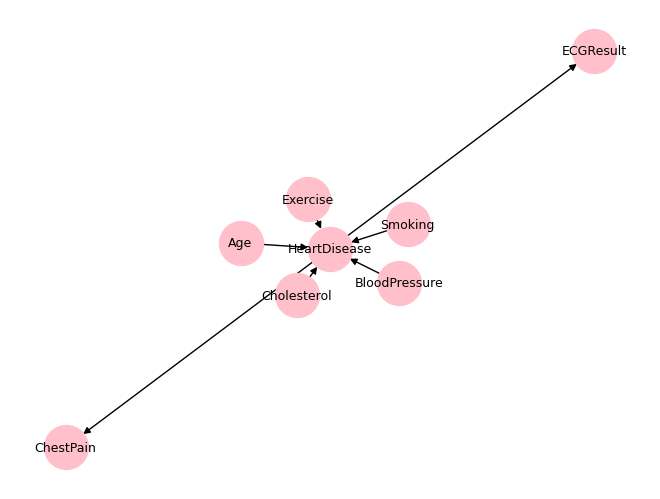

In [17]:
nx_graph = nx.DiGraph(model.edges())

nx.draw(nx_graph, with_labels=True, node_color='pink', node_size=1000, font_size=9, edge_color='black')

plt.show()